In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import librosa

In [38]:
# Load the dataset
data = pd.read_csv("/content/Dataset_Parkinson_Disease_Detection_SIP_Project_Group11.csv")

In [39]:
import librosa
import pandas as pd

def extract_features(row, sr=1000, n_mfcc=13, dct_type=2, norm='ortho',hop_length=512, n_fft=1024, win_length=400, window='hann'):
    numeric_values = row.astype(float).values
    mfccs = librosa.feature.mfcc(y=numeric_values, sr=sr, n_mfcc=n_mfcc, dct_type=dct_type, norm=norm, hop_length=hop_length, n_fft=n_fft, win_length=win_length, window=window)

    # Initialize an empty dictionary to store features
    features = {}

    # Iterate over the range of n_mfcc
    for i in range(mfccs.shape[0]):
        features[f"mfcc{i+1}_min"] = mfccs[i, :].min()
        features[f"mfcc{i+1}_max"] = mfccs[i, :].max()
        features[f"mfcc{i+1}_std"] = mfccs[i, :].std()
        features[f"mfcc{i+1}_var"] = mfccs[i, :].var()

    return pd.Series(features)

In [ ]:
# Apply feature extraction to numeric columns (excluding "status")
numeric_columns = data.select_dtypes(include=[float, int]).columns
features = data[numeric_columns].apply(extract_features, axis=1)

# Combine features with the original dataset
data = pd.concat([data, features], axis=1)

In [42]:
# Identify features and target variable
X = data.drop(["status"], axis=1)
y = data["status"]

In [43]:
# Exclude non-numeric columns
X_numeric = X.select_dtypes(include=[float, int])

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a model with custom parameters
model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,    # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
    max_features='auto',  # Number of features to consider for the best split (auto = sqrt(n_features))
    bootstrap=True,       # Whether bootstrap samples are used when building trees
    criterion='gini'      # Splitting criterion ('gini' for Gini impurity or 'entropy' for information gain)
)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [45]:
def print_patient_counts(y):
    healthy_count = y.value_counts()[0]
    parkinson_count = y.value_counts()[1]

    print(f"Total Healthy Patients: {int(healthy_count/6)}")
    print(f"Total Parkinson's Patients: {int(parkinson_count/6)}")

# Print total number of healthy and Parkinson's patients in the dataset
print_patient_counts(y)


Total Healthy Patients: 8
Total Parkinson's Patients: 24


In [46]:
accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = "{:.2f}".format(accuracy * 100)
print(f"Accuracy: {formatted_accuracy}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 92.31%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



In [47]:
!pip install scikit-plot

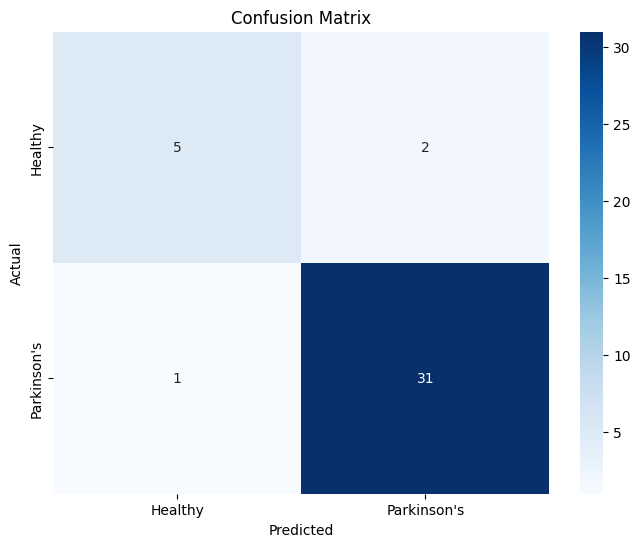

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Healthy", "Parkinson's"], yticklabels=["Healthy", "Parkinson's"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

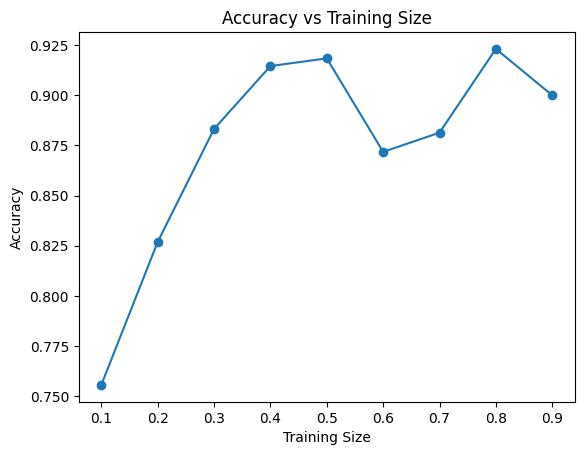

In [49]:
# Initialize lists to store training sizes and accuracies
training_sizes = []
accuracies = []

# Specify the range of training sizes you want to experiment with
for training_size in np.arange(0.1, 1.0, 0.1):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=1 - training_size, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Choose a model (Random Forest as an example)
    model = RandomForestClassifier(random_state=42)

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy and store values
    accuracy = accuracy_score(y_test, y_pred)
    training_sizes.append(training_size)
    accuracies.append(accuracy)

# Plot the accuracy graph
plt.plot(training_sizes, accuracies, marker='o')
plt.title('Accuracy vs Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.show()